In [2]:
import os
import re
import sys
import glob
import json
import shutil
import skimage
import tifffile
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

sys.path.append('/Users/keith.cheveralls/projects/opencell/')
from opencell.imaging import utils, viz

In [17]:
root_dirs = {
    'P10-G3': '2020-02-26-bleaching-tests',
    'P10-H7': '2020-02-27-bleaching-tests',
    'P10-H8': '2020-02-27-bleaching-tests'
}

In [45]:
def get_filename(well, laser_power, exposure_time):
    dirname = '%s_%dpercent-%dms' % (well, laser_power, exposure_time)
    return glob.glob('/Users/keith.cheveralls/image-data/%s/%s/*/*.tif' % (root_dirs[well], dirname))[0]

In [32]:
def generate_naive_mean_profiles(exposure):
    im = tifffile.imread(get_filename(*exposure))
    profile = im.mean(axis=2).mean(axis=1)
    return profile

def generate_masked_mean_profiles(exposure):
    im = tifffile.imread(get_filename(*exposure))
    proj = im.max(axis=0)
    mask = proj > skimage.filters.threshold_li(proj)
    profile = [zslice[mask].flatten().mean() for zslice in im]
    return profile

In [36]:
# exposures as (laser_power, exposure_time)
exposures = [
    (10, 500),
    (15, 500),
    # (15, 750),
    (20, 500),
]

wells = ['P10-G3', 'P10-H7', 'P10-H8']

conditions = []
for well in wells:
    for exposure in exposures:
        conditions.append((well, *exposure))

In [37]:
conditions

[('P10-G3', 10, 500),
 ('P10-G3', 15, 500),
 ('P10-G3', 20, 500),
 ('P10-H7', 10, 500),
 ('P10-H7', 15, 500),
 ('P10-H7', 20, 500),
 ('P10-H8', 10, 500),
 ('P10-H8', 15, 500),
 ('P10-H8', 20, 500)]

In [27]:
im = tifffile.imread(get_filename('P10-G3', 10, 500))
im.shape

(300, 1024, 1024)

In [ ]:
imm = im[0, ...]
proj = im.max(axis=0)
mask = proj > skimage.filters.threshold_li(proj)
plt.imshow(mask)

In [46]:
mean_profiles = {}
for condition in conditions:
    print(condition)
    mean_profiles[condition] = generate_naive_mean_profiles(condition)

('P10-G3', 10, 500)
('P10-G3', 15, 500)
('P10-G3', 20, 500)
('P10-H7', 10, 500)
('P10-H7', 15, 500)
('P10-H7', 20, 500)
('P10-H8', 10, 500)
('P10-H8', 15, 500)
('P10-H8', 20, 500)


In [47]:
masked_mean_profiles = {}
for condition in conditions:
    masked_mean_profiles[condition] = generate_masked_mean_profiles(condition)

In [ ]:
masked_mean_profiles[('P10-H7', 15, 500)]

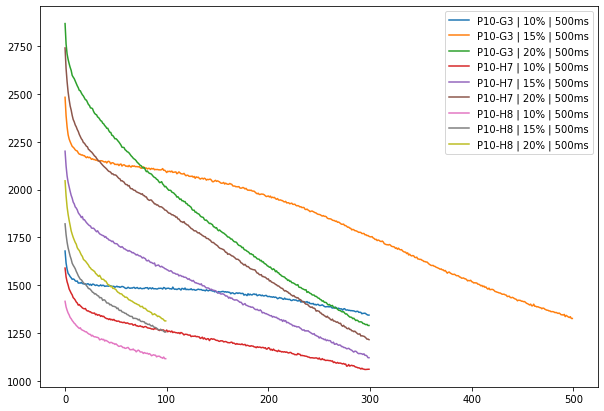

In [59]:
# mean profiles of masked images
plt.figure(figsize=(10, 7))
for condition in (conditions): #.difference([(15, 750)]):
    well, laser_power, exposure_time = condition
    profile = np.array(masked_mean_profiles[condition])
    plt.plot(
        np.arange(len(profile)), 
        profile, 
        label='%s | %s%% | %dms' % condition)
    
    plt.legend()
    #plt.gca().set_xlim([0, 300])
    #plt.gca().set_ylim([0, 3000])

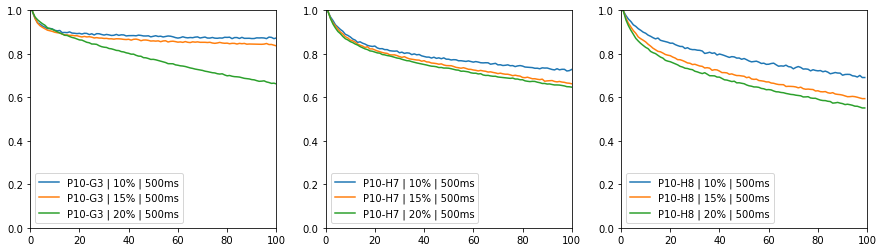

In [57]:
# normalized mean profiles of masked images
background = 500
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for ind, well in enumerate(wells):
    ax = axs[ind]
    for exposure in exposures:
        profile = np.array(masked_mean_profiles[(well, *exposure)])
        ax.plot(
            np.arange(len(profile)), 
            (profile - background)/(profile[:3].mean() - background), 
            label='%s | %s%% | %dms' % (well, *exposure))

        ax.legend()
        ax.set_xlim([0, 100])
        ax.set_ylim([0, 1])

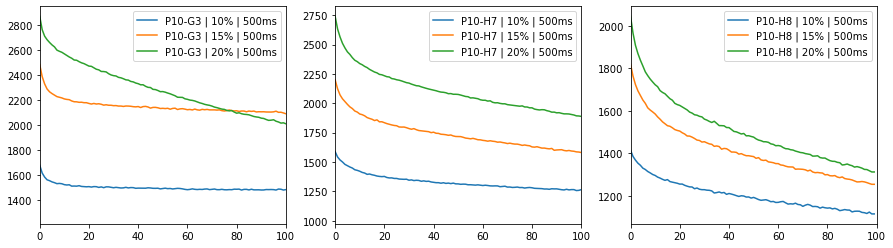

In [61]:
# normalized mean profiles of masked images
background = 500
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for ind, well in enumerate(wells):
    ax = axs[ind]
    for exposure in exposures:
        profile = np.array(masked_mean_profiles[(well, *exposure)])
        ax.plot(
            np.arange(len(profile)), 
            profile,
            label='%s | %s%% | %dms' % (well, *exposure))

        ax.legend()
        ax.set_xlim([0, 100])
        # ax.set_ylim([0, 1])